In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk

In [20]:
train = '/home/hp/Documents/College/Coding/Machine Learning/bulldozers_price_prediction_project/data_for_bulldozers/Train.csv'
valid = '/home/hp/Documents/College/Coding/Machine Learning/bulldozers_price_prediction_project/data_for_bulldozers/Valid.csv'
test = '/home/hp/Documents/College/Coding/Machine Learning/bulldozers_price_prediction_project/data_for_bulldozers/Test.csv'
train_and_valid = '/home/hp/Documents/College/Coding/Machine Learning/bulldozers_price_prediction_project/data_for_bulldozers/TrainAndValid.csv'

In [21]:
training_dataset = pd.read_csv(train_and_valid, low_memory=False, parse_dates=['saledate'])
test_df = pd.read_csv(test, low_memory=False, parse_dates=['saledate'])

In [22]:
test_df.shape

(12457, 52)

### Preprocessing our test data

In [23]:
def preprocess_data(df):
    '''
    Performs transformations on a dataframe and returns the transformed df
    '''
    
    df['saleYear'] = df['saledate'].dt.year
    df['saleDay'] = df['saledate'].dt.day
    df['saleMonth'] = df['saledate'].dt.month
    df['saleDayOfWeek'] = df['saledate'].dt.dayofweek
    df['saleDayOfYear'] = df['saledate'].dt.dayofweek

    #fill numeric rows with median
    for label, content in df.items():
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():
                #adding extra binary column to show whether the field was originally missing or not
                df[label + '_is_missing'] = pd.isnull(content)

            #filling the missing values with median
            df[label] = content.fillna(content.median())
    
    
    #convert non numeric rows into categories
    for label, content in df.items():
        if not pd.api.types.is_numeric_dtype(content):
            #add a binary column to indicate whether the the sample was missing or not
            df[label+'_is_missing']  = pd.isnull(content)
            #turn categories into numbers and add 1 for all the values to be positive
            df[label] = pd.Categorical(content).codes+1
        
    return df

In [24]:
preprocess_data(training_dataset)

/tmp/ipykernel_5526/1625197887.py:27: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[label+'_is_missing']  = pd.isnull(content)
/tmp/ipykernel_5526/1625197887.py:27: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[label+'_is_missing']  = pd.isnull(content)
/tmp/ipykernel_5526/1625197887.py:27: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmen

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,2,2647,...,True,True,True,True,True,True,True,True,False,False
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,2,2148,...,True,True,True,True,True,True,True,True,False,False
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,1,2131,...,True,True,True,True,True,True,True,True,True,True
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,1,3753,...,True,True,True,True,True,True,True,True,True,True
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,3,3281,...,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
412693,6333344,10000.0,1919201,21435,149,2.0,2005,0.0,0,3968,...,False,False,False,False,False,True,True,True,True,True
412694,6333345,10500.0,1882122,21436,149,2.0,2005,0.0,0,3939,...,False,False,False,False,False,True,True,True,True,True
412695,6333347,12500.0,1944213,21435,149,2.0,2005,0.0,0,3939,...,False,False,False,False,False,True,True,True,True,True
412696,6333348,10000.0,1794518,21435,149,2.0,2006,0.0,0,3968,...,False,False,False,False,False,True,True,True,True,True


In [25]:
training_dataset.head().T

,0,1,2,3,4
SalesID,1139246,1139248,1139249,1139251,1139253
SalePrice,66000.0,57000.0,10000.0,38500.0,11000.0
MachineID,999089,117657,434808,1026470,1057373
ModelID,3157,77,7009,332,17311
datasource,121,121,121,121,121
...,...,...,...,...,...
Backhoe_Mounting_is_missing,True,True,True,True,True
Blade_Type_is_missing,True,True,True,True,True
Travel_Controls_is_missing,True,True,True,True,True
Differential_Type_is_missing,False,False,True,True,True


In [26]:
#splitting "training dataset" which was actually the mixture of training and validation sets into training and validation
df_val = training_dataset[training_dataset['saleYear'] == 2012]
df_train = training_dataset[training_dataset['saleYear'] != 2012]
len(df_val), len(df_train)

(11573, 401125)

In [27]:
#split data into X & y
X_train, y_train = df_train.drop('SalePrice', axis=1), df_train['SalePrice']
X_valid, y_valid = df_val.drop('SalePrice', axis = 1), df_val['SalePrice']

# len(X_train), len(y_train), len(X_valid), len(y_valid)
X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((401125, 104), (401125,), (11573, 104), (11573,))

In [28]:
#Create evaluation function (this competition uses RMSLE)
from sklearn.metrics import mean_squared_log_error, mean_absolute_error, r2_score
#sklearn doesnt have any inbuilt function for RSMLE but we do have MSLE
def rsmle(y_test, y_preds):
    return np.sqrt(mean_squared_log_error(y_true=y_test, y_pred=y_preds))

#Creating a function to evaluate model on a few different metrics
#the idea here is that the model should perform worse on the validation data then the training data
def show_scores(model):
    '''
    We need the predicted values to evaluate the function in the first place
    '''
    y_train_preds = model.predict(X_train)
    y_valid_preds = model.predict(X_valid)

    scores = {
        'Training MAE' : mean_absolute_error(y_train, y_train_preds),
        'Valid MAE' : mean_absolute_error(y_valid, y_valid_preds),
        'Training RSMLE' : rsmle(y_train, y_train_preds),
        'Valid RSMLE' : rsmle(y_valid, y_valid_preds),
        'Training R2' : r2_score(y_train, y_train_preds),
        'Valid R2' : r2_score(y_valid, y_valid_preds)
    }
    return scores

In [33]:
%%time

#Most ideal parameters
from sklearn.ensemble import RandomForestRegressor
#Instantiating the model
ideal_model = RandomForestRegressor(n_estimators=40,
                                    min_samples_leaf = 1,
                                    min_samples_split = 14,
                                    max_features = 0.5,
                                    n_jobs = -1,
                                    max_samples = None,
                                    random_state = 42)
#Fitting the model
ideal_model.fit(X_train, y_train)

CPU times: user 4min 34s, sys: 2.78 s, total: 4min 37s
Wall time: 51.5 s


RandomForestRegressor(max_features=0.5, min_samples_split=14, n_estimators=40,
                      n_jobs=-1, random_state=42)

In [29]:
preprocess_data(test_df)

/tmp/ipykernel_5526/1625197887.py:27: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[label+'_is_missing']  = pd.isnull(content)
/tmp/ipykernel_5526/1625197887.py:27: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[label+'_is_missing']  = pd.isnull(content)


,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,3,499,...,True,True,True,True,True,True,True,True,True,True
1,1227844,1022817,7271,121,3,1000,28555.0,1,9,831,...,True,True,True,True,True,True,True,True,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,9,1177,...,False,False,False,False,False,True,True,True,True,True
3,1227848,56204,1269,121,3,2006,8940.0,1,9,287,...,False,False,False,False,False,True,True,True,True,True
4,1227863,1053887,22312,121,3,2005,2286.0,2,9,566,...,True,True,True,True,True,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12452,6643171,2558317,21450,149,2,2008,3525.0,0,126,713,...,False,False,False,False,False,True,True,True,True,True
12453,6643173,2558332,21434,149,2,2005,3525.0,0,126,186,...,False,False,False,False,False,True,True,True,True,True
12454,6643184,2558342,21437,149,2,1000,3525.0,0,126,325,...,False,False,False,False,False,True,True,True,True,True
12455,6643186,2558343,21437,149,2,2006,3525.0,0,126,325,...,False,False,False,False,False,True,True,True,True,True


In [31]:
set(X_train.columns) - set(test_df.columns)

{'auctioneerID_is_missing'}

In [35]:
X_train

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1139246,999089,3157,121,3.0,2004,68.0,2,2647,963,...,True,True,True,True,True,True,True,True,False,False
1,1139248,117657,77,121,3.0,1996,4640.0,2,2148,1745,...,True,True,True,True,True,True,True,True,False,False
2,1139249,434808,7009,121,3.0,2001,2838.0,1,2131,336,...,True,True,True,True,True,True,True,True,True,True
3,1139251,1026470,332,121,3.0,2001,3486.0,1,3753,3716,...,True,True,True,True,True,True,True,True,True,True
4,1139253,1057373,17311,121,3.0,2007,722.0,3,3281,4261,...,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401120,6333336,1840702,21439,149,1.0,2005,0.0,0,3876,666,...,False,False,False,False,False,True,True,True,True,True
401121,6333337,1830472,21439,149,1.0,2005,0.0,0,3876,666,...,False,False,False,False,False,True,True,True,True,True
401122,6333338,1887659,21439,149,1.0,2005,0.0,0,3876,666,...,False,False,False,False,False,True,True,True,True,True
401123,6333341,1903570,21435,149,2.0,2005,0.0,0,3869,490,...,False,False,False,False,False,True,True,True,True,True


#### Explanation: 
The reason why we don't have 'auctioneerID_is_missing' in the dataset is because the 'auctioneerID' row didn't have any missing values. We will manually create a column and set it all to false


In [34]:
test_df['auctioneerID_is_missing'] = False
test_df.head()

/tmp/ipykernel_5526/901522293.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df['auctioneerID_is_missing'] = False


,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing,auctioneerID_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,3,499,...,True,True,True,True,True,True,True,True,True,False
1,1227844,1022817,7271,121,3,1000,28555.0,1,9,831,...,True,True,True,True,True,True,True,False,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,9,1177,...,False,False,False,False,True,True,True,True,True,False
3,1227848,56204,1269,121,3,2006,8940.0,1,9,287,...,False,False,False,False,True,True,True,True,True,False
4,1227863,1053887,22312,121,3,2005,2286.0,2,9,566,...,True,True,True,True,False,False,False,True,True,False


In [36]:
test_preds = ideal_model.predict(test_df)

/home/hp/.local/lib/python3.10/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


In [37]:
len(test_preds)

12457

Turn it into the format kaggle is been looking for

In [38]:
bulldozer_prediction = pd.DataFrame()
bulldozer_prediction['salesID'] = test_df['SalesID']
bulldozer_prediction['SalesPrice'] = test_preds
bulldozer_prediction

,salesID,SalesPrice
0,1227829,30127.742685
1,1227844,25745.414228
2,1227847,73737.558565
3,1227848,77369.436458
4,1227863,51812.513856
...,...,...
12452,6643171,45447.666791
12453,6643173,19133.845470
12454,6643184,18806.212445
12455,6643186,23237.932126


In [39]:
#Export the predicted data
bulldozer_prediction.to_csv('/home/hp/Documents/College/Coding/Machine Learning/bulldozers_price_prediction_project/data_for_bulldozers/test_predictions.csv', index = False)

#### Feature Importance
Feature importance seeks to figure out which different attributes of the data were most important when it comes to predicting the **target variable** (SalePrice)

In [40]:
ideal_model.feature_importances_

array([2.78683224e-02, 1.94010006e-02, 4.27066369e-02, 1.31824203e-03,
       2.95246606e-03, 1.84827260e-01, 2.64843111e-03, 8.94678534e-04,
       6.42360192e-02, 4.41349627e-02, 4.41354226e-02, 6.91526792e-02,
       5.12569143e-03, 2.51063298e-02, 1.32681264e-01, 5.03995886e-02,
       5.45657114e-03, 4.29322566e-03, 5.04485486e-03, 3.04737018e-03,
       9.93104890e-02, 5.36119638e-04, 9.29551128e-05, 1.18064520e-03,
       1.84862264e-04, 1.75876803e-03, 2.45743979e-05, 2.20678735e-03,
       6.77680434e-03, 2.43199542e-03, 1.00401513e-03, 3.47523305e-03,
       1.57011615e-03, 5.31627092e-03, 5.52967307e-04, 6.97403533e-04,
       8.41409259e-03, 8.23847304e-04, 1.96837214e-02, 2.26059545e-03,
       1.69241025e-04, 9.54436677e-04, 9.77436340e-04, 8.26197253e-04,
       5.39979173e-04, 3.76305315e-04, 3.25932249e-04, 7.36913895e-04,
       2.29388212e-03, 1.18193352e-03, 3.10256639e-04, 2.46002663e-04,
       2.49826280e-02, 5.11544090e-03, 4.34269356e-03, 1.82945959e-03,
      

In [45]:
#These feature importances map to each column in our dataset. that's why they are of the same shape

#Plot a helper function to vizualize the feature importances mapping to each column
def plot_features(columns, importances, n = 20): #only mapping the top 20 features
    df = (pd.DataFrame({
        'features' : columns,
        'feature_importances' : importances})
        .sort_values("feature_importances", ascending=False)
        .reset_index(drop=True))

    #plot the dataframe
    fig, ax = plt.subplots()
    ax.barh(df['features'][:n], df['feature_importances'][:n])
    ax.set_ylabel('Features')
    ax.set_xlabel('Feature Importance')
    ax.invert_yaxis()

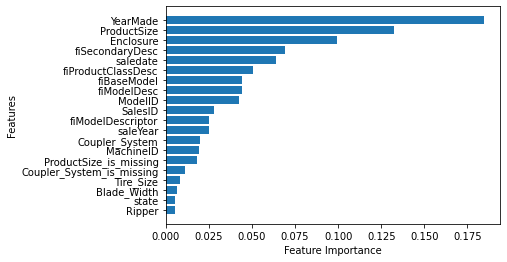

In [46]:
plot_features(X_train.columns, ideal_model.feature_importances_)